Loading relevant libraries

In [1]:
library(tidyverse)
library(readxl)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Reading and separating the data by year

In [2]:
cius_all <- read_excel("data/CIUS_2020_2018_ALL.xlsx") 
cius_2020_raw <- cius_all |> select("YR_2020" = UI_060A)
cius_2018_raw <- cius_all |> select("YR_2018" = UI_210A) |> filter(YR_2018 != "NA")
cius_2020_raw
cius_2018_raw

YR_2020
<dbl>
4
2
4
⋮
5
4
96


YR_2018
<dbl>
4
6
2
⋮
1
3
2


Removing invalid responses

In [3]:
cius_2020_clean <- cius_2020_raw |> filter(YR_2020 <= 6)
cius_2018_clean <- cius_2018_raw |> filter(YR_2018 <= 5)

cius_2020_clean
cius_2018_clean

YR_2020
<dbl>
4
2
4
⋮
5
5
4


YR_2018
<dbl>
4
2
1
⋮
1
3
2


The number of invalid responses removed in 2018:

In [4]:
removed_2018 <- nrow(cius_2018_raw) - nrow(cius_2018_clean)
removed_2018

[1] 1859

The number of invalid responses removed in 2020:

In [5]:
removed_2020 <- nrow(cius_2020_raw) - nrow(cius_2020_clean)
removed_2020

[1] 2426

Scaling the 2020 by decrementing any response 2 or greater by 1

In [6]:
cius_2020_scaled <- cius_2020_clean |> mutate(YR_2020 = ifelse(YR_2020 == 1, YR_2020, YR_2020 - 1))

cius_2020_scaled

YR_2020
<dbl>
3
1
3
⋮
4
4
3


Calculating the averages for the data

In [7]:
cius_2020_mean <- summarise(cius_2020_scaled, "mean" = mean(YR_2020))
cius_2018_mean <- summarise(cius_2018_clean, "mean" = mean(YR_2018))
cius_2020_mean
cius_2018_mean

mean
<dbl>
2.5298


mean
<dbl>
2.341478


Tidying data

In [8]:
results <- bind_rows(cius_2020_mean, cius_2018_mean) |> bind_cols(tibble("year" = c("2020", "2018")))
results

mean,year
<dbl>,<chr>
2.529800,2020
2.341478,2018


Visualizing data

Saving 6.67 x 6.67 in image


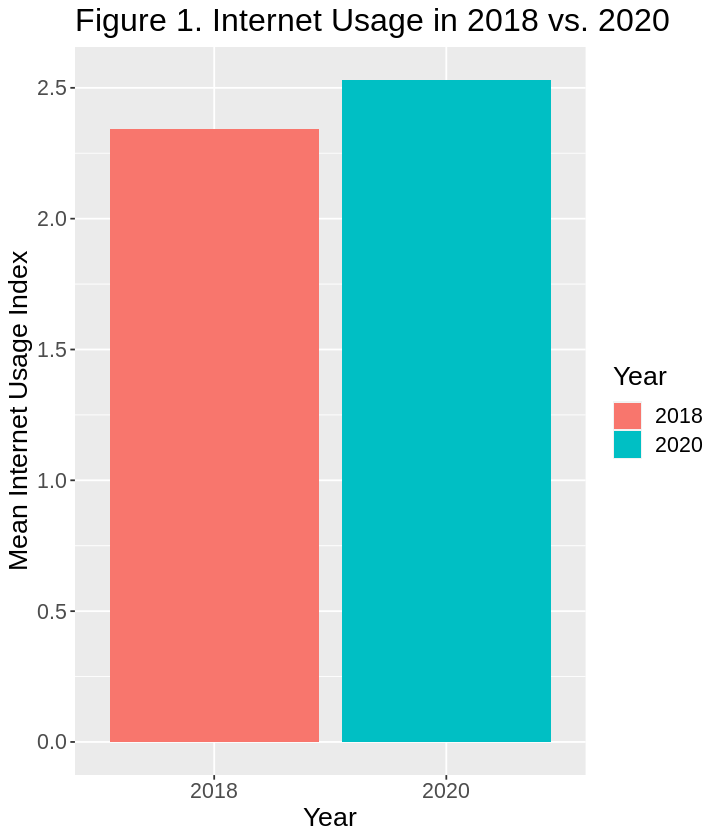

In [15]:
options(repr.plot.width = 6)
results_plot <- ggplot(results, aes(x = year, y = mean, fill = year)) + geom_bar(stat = "identity") +
labs(x = "Year", y = "Mean Internet Usage Index", fill = "Year") +
  theme(text = element_text(size = 16)) +
ggtitle("Figure 1. Internet Usage in 2018 vs. 2020")
results_plot
ggsave("images/results_plot.png", results_plot)

Checking to see if there is a normal distribution:

Saving 6.67 x 6.67 in image


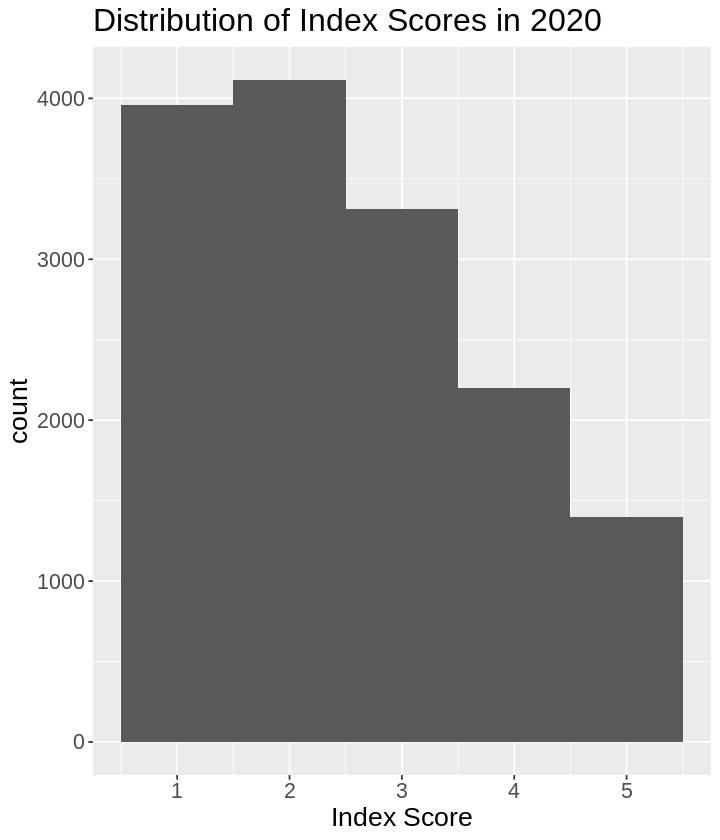

In [10]:
normal_2020 <- ggplot(cius_2020_scaled, aes(x = YR_2020)) +
  geom_histogram(binwidth = 1) +
  labs(x = "Index Score") +
  theme(text = element_text(size = 16)) +
ggtitle("Distribution of Index Scores in 2020")
normal_2020
ggsave("images/normal_2020.png", normal_2020)

Saving 6.67 x 6.67 in image


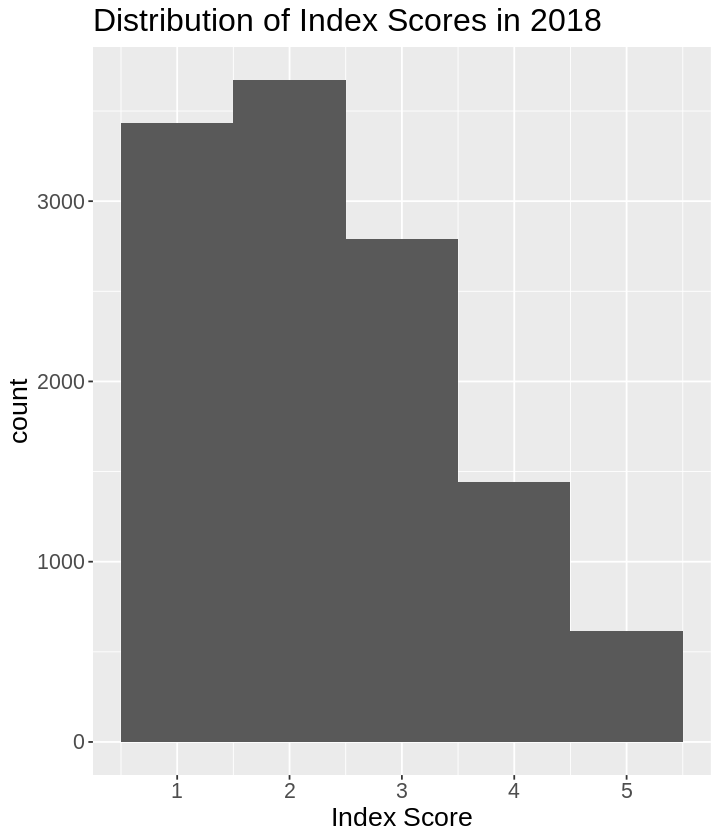

In [11]:
normal_2018 <- ggplot(cius_2018_clean, aes(x = YR_2018)) +
  geom_histogram(binwidth = 1) +
  labs(x = "Index Score") +
  theme(text = element_text(size = 16)) +
ggtitle("Distribution of Index Scores in 2018")
normal_2018
ggsave("images/normal_2018.png", normal_2018)

Neither year have results that are normally distributed.

Writing to CSV

In [12]:
write_csv(cius_2020_scaled, "data/cius_2020_scaled.csv")

In [13]:
write_csv(cius_2018_clean, "data/cius_2018_clean.csv")